In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
!wget https://vps.shanika.net/gtex/paper/data_log1p.npz

--2025-01-20 11:48:16--  https://vps.shanika.net/gtex/paper/data_log1p.npz
Resolving vps.shanika.net (vps.shanika.net)... 37.60.228.2
Connecting to vps.shanika.net (vps.shanika.net)|37.60.228.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1280007648 (1.2G)
Saving to: ‘data_log1p.npz’

data_log1p.npz      100%[===================>]   1.19G  19.6MB/s    in 64s     

2025-01-20 11:49:21 (19.1 MB/s) - ‘data_log1p.npz’ saved [1280007648/1280007648]



In [ ]:
!wget https://vps.shanika.net/gtex/paper/data.json

--2025-01-20 11:50:36--  https://vps.shanika.net/gtex/paper/data.json
Resolving vps.shanika.net (vps.shanika.net)... 37.60.228.2
Connecting to vps.shanika.net (vps.shanika.net)|37.60.228.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 781326 (763K) [application/json]
Saving to: ‘data.json’

data.json           100%[===================>] 763.01K   960KB/s    in 0.8s    

2025-01-20 11:50:38 (960 KB/s) - ‘data.json’ saved [781326/781326]



In [ ]:
loaded_data  = np.load('data_log1p.npz')

In [ ]:
A = loaded_data['gtexdatalog']

In [ ]:
A.shape

(27, 943, 19121)

In [ ]:
with open('data.json', 'r') as f:
    [tissue_index, donor_index, gene_index, tissue_donor] = json.load(f)

In [ ]:
len(tissue_donor)

27

In [ ]:
tissue_index

{'adipose_subcutaneous': 0,
 'adrenal_gland': 1,
 'artery_tibial': 2,
 'brain_cerebellum': 3,
 'breast_mammary_tissue': 4,
 'colon_transverse': 5,
 'esophagus_mucosa': 6,
 'heart_left_ventricle': 7,
 'kidney_cortex': 8,
 'liver': 9,
 'lung': 10,
 'minor_salivary_gland': 11,
 'muscle_skeletal': 12,
 'nerve_tibial': 13,
 'ovary': 14,
 'pancreas': 15,
 'pituitary': 16,
 'prostate': 17,
 'skin_sun_exposed_lower_leg': 18,
 'small_intestine_terminal_ileum': 19,
 'spleen': 20,
 'stomach': 21,
 'testis': 22,
 'thyroid': 23,
 'uterus': 24,
 'vagina': 25,
 'whole_blood': 26}

## Gene to Gene Corelation for Vaginal Tissues

In [ ]:
vagina = A[25, [donor_index.get(key) for key in tissue_donor['vagina']], :].T

In [ ]:
vagina.shape

(19121, 156)

In [ ]:
vagina

array([[3.16716139, 3.385068  , 3.32143241, ..., 3.50043922, 3.52900409,
        3.39282913],
       [0.51867474, 0.02508278, 0.30564477, ..., 0.08470873, 0.13653936,
        0.        ],
       [4.16929742, 3.92750258, 4.16759502, ..., 4.35786201, 4.25816265,
        3.85946575],
       ...,
       [1.35118518, 1.80319385, 1.52191731, ..., 1.6501959 , 1.94676692,
        0.70606341],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.88703286, 1.62708135, 1.62294626, ..., 1.2759213 , 2.46044318,
        1.65479361]])

In [ ]:
r_vagina = np.corrcoef(vagina)

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
r_vagina.shape

(19121, 19121)

In [ ]:
r_vagina

array([[ 1.        ,  0.21318926,  0.2370673 , ...,  0.25407601,
        -0.10485314, -0.00452932],
       [ 0.21318926,  1.        ,  0.24913195, ...,  0.4400663 ,
         0.00670415, -0.1776348 ],
       [ 0.2370673 ,  0.24913195,  1.        , ...,  0.41905908,
        -0.09812255, -0.14978752],
       ...,
       [ 0.25407601,  0.4400663 ,  0.41905908, ...,  1.        ,
         0.07839759, -0.0097438 ],
       [-0.10485314,  0.00670415, -0.09812255, ...,  0.07839759,
         1.        , -0.07541382],
       [-0.00452932, -0.1776348 , -0.14978752, ..., -0.0097438 ,
        -0.07541382,  1.        ]])

In [ ]:
# plt.figure(figsize=(12, 12))
# plt.imshow(r_vagina, cmap='Paired')
# plt.colorbar(label='Correlation')
# plt.title('Heatmap of Gene Correlation Coefficient of Vaginal Tissue')
# plt.xlabel('Genes')
# plt.ylabel('Genes')
# plt.show()

In [ ]:
np.nanmax(r_vagina[r_vagina<0.99])

0.9893733217769458

In [ ]:
np.nanmin(r_vagina)

-0.8863841924389132

In [ ]:
vag_g0_g1 = A[25, [donor_index.get(key) for key in tissue_donor['vagina']], 0:2]

In [ ]:
vag_g0_g1.shape

(156, 2)

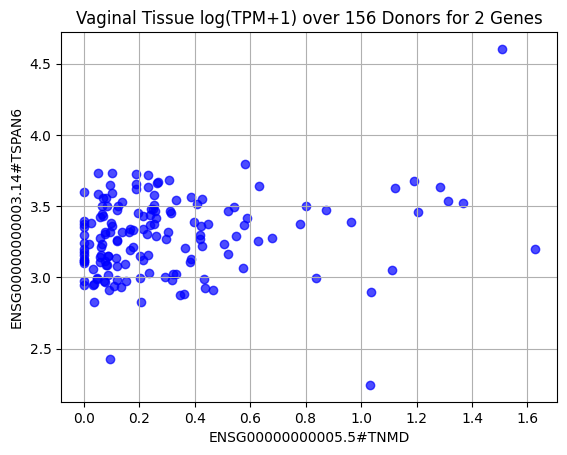

In [ ]:
plt.scatter(vag_g0_g1[:,1], vag_g0_g1[:,0], color='blue', alpha=0.7, label='log(TPM+1)')
plt.title('Vaginal Tissue log(TPM+1) over 156 Donors for 2 Genes')
plt.xlabel(list(gene_index.keys())[1])
plt.ylabel(list(gene_index.keys())[0])
plt.grid(True)

## Principle Component Analysis

In [ ]:
scaler = StandardScaler()
s_vagina = scaler.fit_transform(vagina.T)

In [ ]:
s_vagina.shape

(156, 19121)

In [ ]:
pca = PCA(n_components=0.99)
vag_pca = pca.fit_transform(s_vagina)

In [ ]:
vag_pca

array([[-3.69728795e+01,  7.95003047e+01,  1.36538633e+01, ...,
        -1.95956192e+00,  1.72047679e+00, -3.61663125e+00],
       [ 4.35926872e+00,  2.24346827e+01, -8.18921865e+01, ...,
         4.82866885e+00,  6.85909472e-01, -1.46420122e+00],
       [-3.45535020e+01, -4.17049962e+00,  5.20940529e+01, ...,
        -5.13699833e+00,  1.84968825e+00, -8.07294353e-01],
       ...,
       [ 8.83316708e+01,  5.32506392e+00, -1.82940941e+01, ...,
        -5.56606739e-01,  4.41250672e-01,  4.98441804e-01],
       [ 3.60385964e+01,  5.13928127e+01, -8.91227696e+00, ...,
        -2.45043147e+00,  3.04103752e+00,  4.29048010e+00],
       [-1.63882730e+02, -1.81745541e+01,  5.36110133e+00, ...,
        -8.13586601e+00, -1.92984910e+00,  5.76472941e-02]])

In [ ]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [ ]:
print(f"PCA-transformed data shape: {vag_pca.shape}")
print(f"Explained variance by each component: {explained_variance}")
print(f"Cumulative explained variance: {cumulative_variance}")

PCA-transformed data shape: (156, 144)
Explained variance by each component: [0.32097065 0.08580851 0.06054398 0.03445173 0.0293947  0.02374646
 0.02155375 0.01816183 0.01778392 0.01529819 0.01279803 0.01181619
 0.01089744 0.00988588 0.00924782 0.00880322 0.0079742  0.00789469
 0.0075536  0.00713105 0.00682967 0.00664238 0.00622359 0.00587264
 0.0055286  0.00513433 0.00506609 0.00495912 0.00469079 0.00467905
 0.0044345  0.00425275 0.00407996 0.00396028 0.0038459  0.00378085
 0.00366877 0.00351488 0.0034922  0.00330015 0.00324893 0.00318879
 0.00312785 0.00300695 0.00292715 0.00288862 0.00283495 0.00277011
 0.00269107 0.00264334 0.00260531 0.00255357 0.00251699 0.00243824
 0.0023946  0.00235914 0.00232488 0.00228789 0.00223615 0.00219957
 0.00218692 0.00217681 0.00212273 0.00210844 0.00204695 0.00203324
 0.00199634 0.00194022 0.00192512 0.00190584 0.00188326 0.00186255
 0.0018402  0.00181876 0.00180588 0.00178416 0.00175399 0.00174904
 0.00173495 0.00173247 0.00169795 0.00168158 0.00167

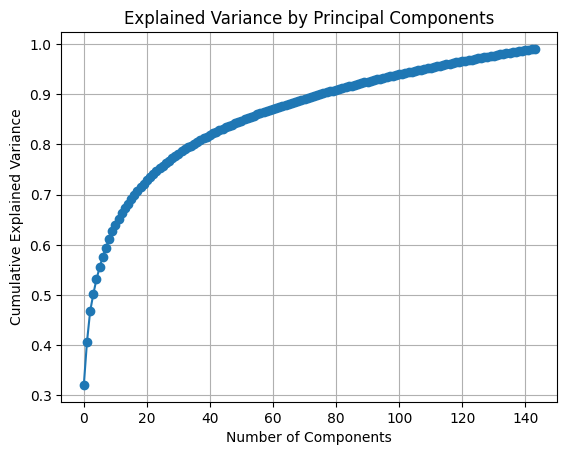

In [ ]:
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

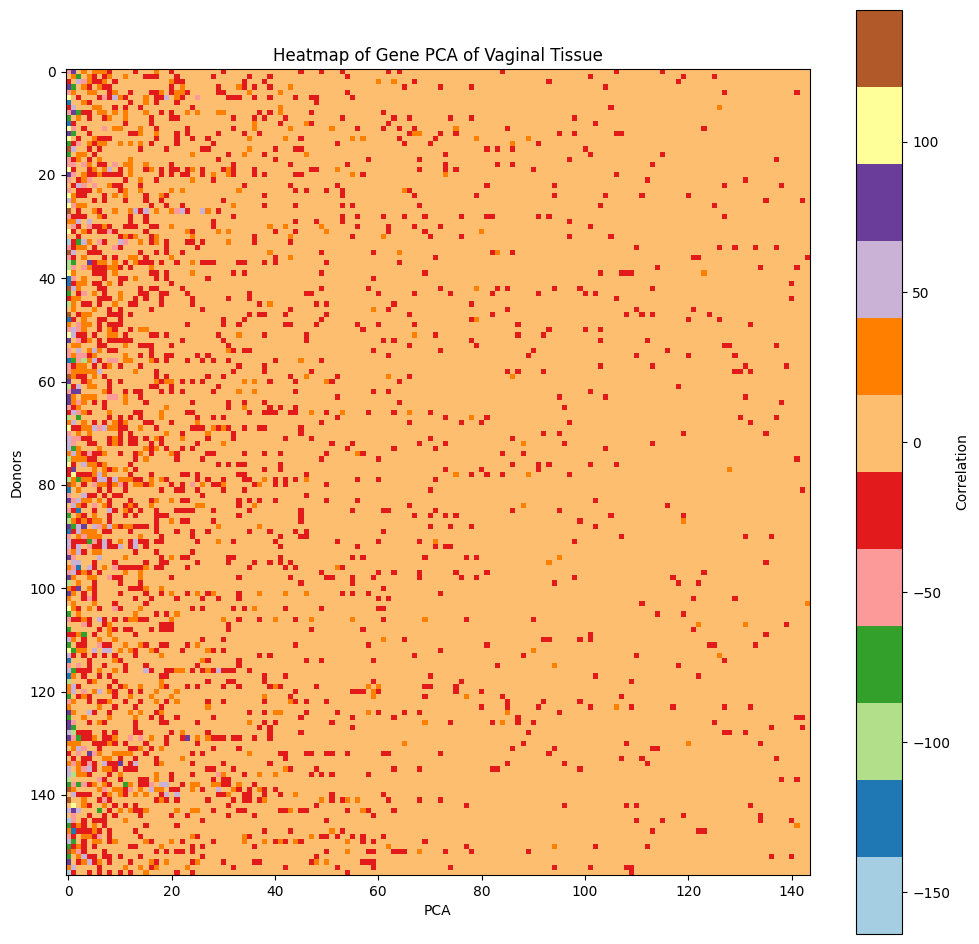

In [ ]:
plt.figure(figsize=(12, 12))
plt.imshow(vag_pca, cmap='Paired')
plt.colorbar(label='Correlation')
plt.title('Heatmap of Gene PCA of Vaginal Tissue')
plt.xlabel('PCA')
plt.ylabel('Donors')
plt.show()

## Tissue to Tissue Correlation for one Gene

In [ ]:
t2t = A[:, :, 0]

In [ ]:
t2t.shape

(27, 943)

In [ ]:
r_t2t = np.corrcoef(t2t)

In [ ]:
r_t2t.shape

(27, 27)

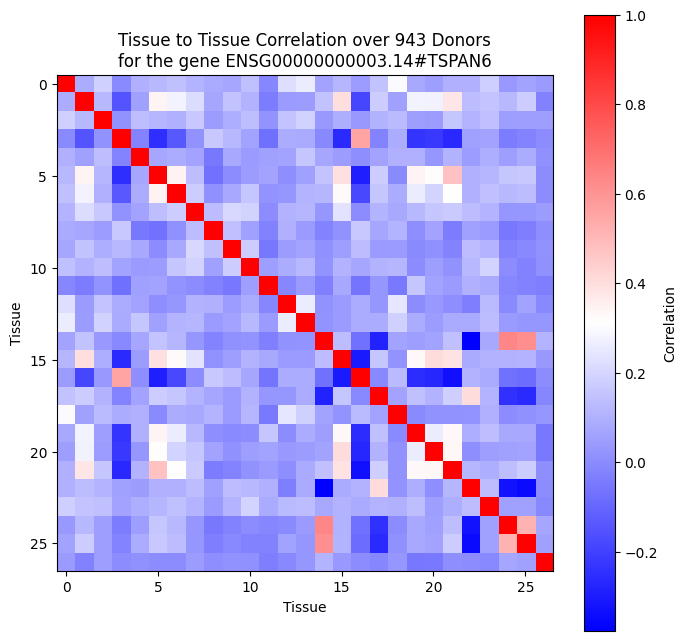

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(r_t2t, cmap='bwr')
plt.colorbar(label='Correlation')
plt.title("Tissue to Tissue Correlation over 943 Donors\nfor the gene " + list(gene_index.keys())[0])
plt.xlabel('Tissue')
plt.ylabel('Tissue')
plt.show()

## 2 Tissue corrlation over all donors for one gene

Selectted tissues - Vagina and Stomach

In [ ]:
common_donors = [item for item in tissue_donor['vagina'] if item in tissue_donor['stomach']]

In [ ]:
len(common_donors)

90

In [ ]:
t1t2g1 = A[:, [donor_index.get(key) for key in common_donors], 0].T

In [ ]:
t1t2g1.shape

(90, 27)

In [ ]:
t1t2g1 = t1t2g1[:, [21,25]]

In [ ]:
t1t2g1.shape

(90, 2)

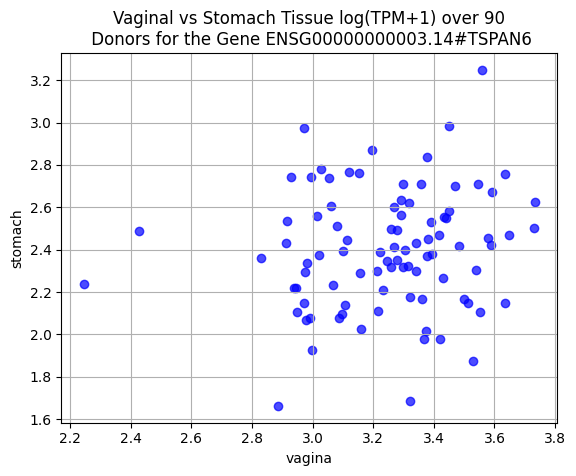

In [ ]:
plt.scatter(t1t2g1[:,1], t1t2g1[:,0], color='blue', alpha=0.7, label='log(TPM+1)')
plt.title('Vaginal vs Stomach Tissue log(TPM+1) over ' + str(len(common_donors)) + "\n Donors for the Gene " + list(gene_index.keys())[0])
plt.xlabel(list(tissue_index.keys())[25])
plt.ylabel(list(tissue_index.keys())[21])
plt.grid(True)